<h1>Detekcija srčanih bolesti</h1>

U sklopu predmeta "Uvod u znanost o podacima" napravio sam model za detekciju srčanih bolesti.
Rad se temelji na objavljenom istraživanju: "Implementation of Machine Learning Model to Predict Heart Failure Disease, u sklopu članka - "(IJACSA) International Journal of Advanced Computer Science and Applications, Vol. 10, No. 6, 2019"

Prema istraživanju kardiovaskularne bolesti su jedne od najčešćih bolesti koje mogu utjecati na zdravlje ljudi. Svake godine 26 milijona ljudi je pod utjecajem srčanih bolesti među kojima neki od njih rezultiraju zastojem srca.

Osobe koje su pod velikim kardiovaskularnim rizikom zbog prisutnosti određenih pojava poput hipertenzije, dijabetesa i ostalih povezanih simptoma bi trebali preventivno detektirati mogućnost realizacije rizika te u tom kontekstu modeli strojnog učenja mogu biti od velike pomoći.



<h2>Deskriptivna i istraživačka analiza podataka</h2>

Liječnički podaci i istraživanja ukazuju kako na kardiovaskularno zdravlje najviše utječu životne navike; od nezdrave hrane i pušenja do fizičke aktivnosti te stresa.
Kako bi se replicirali podaci istraživanja, na raspolaganju imamo "heart_disease_uci" skup podataka s primjerima, atributima te oznakama srčanih bolesti.

Idemo se upoznati sa skupom podataka, no prije toga moramo učitati sve potrebne biblioteke i okvire.

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



<h3> Učitavanje podataka</h3>

Obzirom da repliciramo rezultate istraživanja, u svrhu usporedbe koristit ćemo podatke pacijenata iz Cleveland dataseta. Kasnije ćemo za poboljšanje rezultata raditi sa cijelim skupom podataka.

In [460]:
X = pd.read_csv("heart_disease_uci.csv", index_col = 0)
X = X[X.dataset == "Cleveland"]
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1


Vidimo da tablica ima 304 primjera s 15 atributa među kojima je "num" ciljna oznaka.

Pojašnjenja značajki:
 - num - ciljana značajka - ciljna oznaka koja govori o razini srčanih bolesti
 - thal - "Thallium test" - kategoričke vrijednosti boli u prsima ili poteškoća s disanjem 
 - ca - status fluoroskopije (Coronary Angiography) - vrsta medicinskog slikanja koja pokazuje koliko arterija prilikom procedure "farbanja" opsrkbljuju srce krvlju.
 - slope - kategorička varijabla koja na temelju ECG mjerenja pokazuje srčano stanje pacijenta za vrijeme fizičke aktivnosti 
 - oldpeak - ST dio elektrokardijagrama (EEG) koji ukazuje ima li smanjenja dotoka krvi u srce za vrijeme fizičke aktivnosti
 - exang - bol u prsima (angina) koja je nastala kao posljedica fizičke aktivnosti (True ako je, false ako nije)
 - thalch - ?
 - restecg - kategorička varijabla koja pokazuje rezultat srčanih abnormalija uz pomoć EKG-a za vrijeme mirovanja
 - fbs - razina šećera u krvi nakon prespavane noći na praznom želudcu. Ako je razina veća od 120mg/dl vrijednost je True, što sugerira hiperglikemiju (znak za dijabetes), inače False
 - chol - mjerenje kolesterola za vrijeme primanja pacijenta u bolnicu
 - trestbps - mjerenje krvnog tlaka za vrijeme primanja pacijenta u bolnicu
 - cp - kategorička varijabla koja gleda razinu inteziteta boli u prsima (angine) za vrijeme primanja pacijenta u bolnicu
 - dataset - ?
 - sex - spol pacijenta [Male, Female]
 - age - godina pacijenta


In [461]:
X.describe(include="all")

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,304.000000,304,304,304,304.000000,304.000000,304,304,304.000000,304,304.000000,303,299.000000,301,304.000000
unique,NaN,2,1,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,upsloping,NaN,normal,NaN
freq,NaN,207,304,144,NaN,NaN,259,151,NaN,205,NaN,142,NaN,166,NaN
mean,54.351974,NaN,NaN,NaN,131.684211,246.315789,NaN,NaN,149.723684,NaN,1.036184,NaN,0.672241,NaN,0.934211
std,9.150256,NaN,NaN,NaN,17.570949,52.108280,NaN,NaN,22.927263,NaN,1.160690,NaN,0.937438,NaN,1.227684
min,28.000000,NaN,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
25%,47.750000,NaN,NaN,NaN,120.000000,211.000000,NaN,NaN,133.750000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,55.500000,NaN,NaN,NaN,130.000000,240.500000,NaN,NaN,153.000000,NaN,0.800000,NaN,0.000000,NaN,0.000000
75%,61.000000,NaN,NaN,NaN,140.000000,275.000000,NaN,NaN,166.000000,NaN,1.600000,NaN,1.000000,NaN,2.000000


Iz ovoga možemo koji su atributi binarne i kategoričke varijable kao i numeričke. 
Možemo primjetiti sljedeće:

- Nedostaju mjerenja sljedećih 3 atributa: slope, ca, thal

Kako bismo bolje uočili anomalije u podacima te ih pripremili za modele, odradit ćemo čišćenje i vizualizaciju.


<h3>Vizualizacija podataka</h3>

<h4>Odnosi između numeričkih atributa<h4>

Idemo vidjeti kakvi su međusobno odnosi između atributa. Vizualizacija nam može pomoći u boljem razumijevanju skupa podataka te pronalasku nedostajučih i stršećih vrijednosti.

In [462]:
X.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

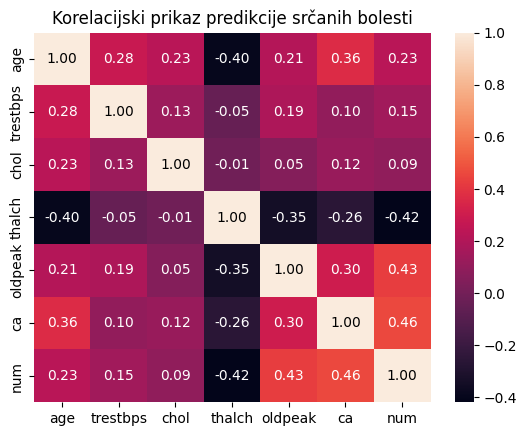

In [517]:
object_columns = X.select_dtypes("object").columns

X_numeric = X.loc[:, ~X.columns.isin(object_columns)]
X_tmp_numeric = X_numeric.copy()

X_tmp_numeric.loc[X_tmp_numeric["num"] > 0, "num"] = 1

correlation_matrix = X_tmp_numeric.corr()
sns.heatmap(X_tmp_numeric.corr(), annot=False)

def get_text_color(value, threshold=0.5):
    if abs(value) > threshold:
        return 'black'
    else:
        return 'white'

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        value = correlation_matrix.iloc[i, j]
        text_color = get_text_color(value)
        plt.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=text_color)
        
plt.title("Korelacijski prikaz predikcije srčanih bolesti")
plt.show()

Korelacija je mjera jakosti linearne veze između dviju varijabli. U našem slučaju, predikcija srčanih bolesti, num atribut, ima srednje pozitivnu linearnu vezu s koronarnom angiografijom (ca) čiji je koeficijent korelacije 0.52 te s oldpeak-om gdje je koeficijent 0.51. To su ujedno najveći koeficijenti korelaciji među svim atributima.
Također, srčane bolesti imaju srednje jaku negativnu korelaciju s thalch atributom.

<h4>Odnosi između kategoričkih atributa<h4>

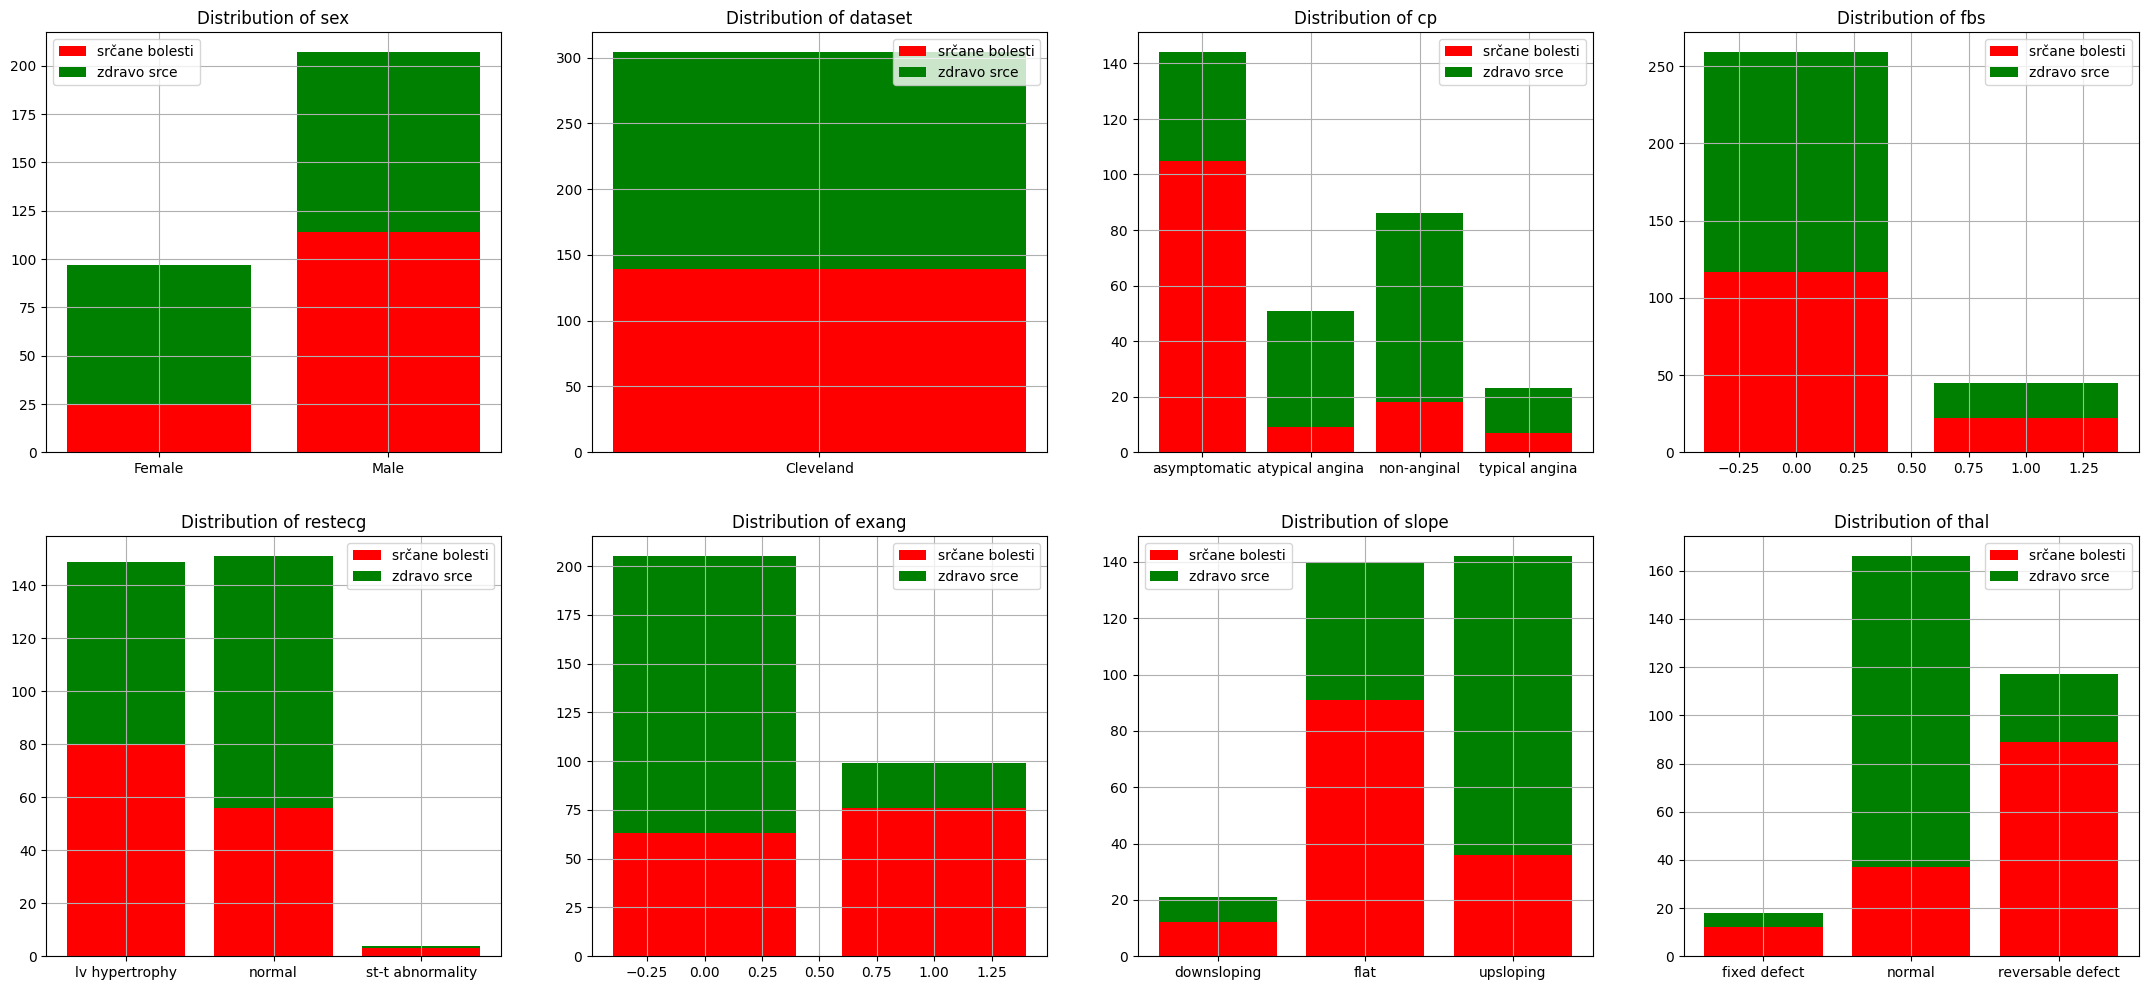

In [552]:
X_categoric = X.loc[:, X.columns.isin(object_columns)]
fig, ax = plt.subplots(2, 4, figsize=(27, 12))
k = 0
for i in range(2):
    for j in range(4):
        column_name = X_categoric.columns[k]

        X_tmp_good = X.loc[X.num == 0].groupby(column_name).count().loc[:, "age"].values
        X_tmp_bad = X.loc[X.num > 0].groupby(column_name).count().loc[:, "age"].values
        spol = X.groupby(column_name).count().index.values
        
            
        ax[i, j].bar(spol, X_tmp_bad, color="red", label="srčane bolesti")
        ax[i, j].bar(spol, X_tmp_good, color="green", label="zdravo srce", bottom=X_tmp_bad)

        ax[i, j].set_title(f"Distribution of {column_name}") 
        ax[i, j].grid(True)
        ax[i, j].legend(loc='best')

        k += 1

plt.show()


Što nam ovi grafovi mogu sugerirati:

 - oko 50% populacija Clevelanda ima srčane bolesti, što je dobro za treniranje modela da imamo podjednak broj primjera

 - oko 60% muške populacije Clevelanda ima neku razinu srčane bolesti, dok je kod žena taj udio znatno manji oko 25%

 - asimptomatska bol u prsima najviše pogađa srčane bolesnike (bez drugih simptoma poput vrtoglavice ili mučnine)

 - razina šećera u krvi natašte nebi trebao imati veliki utjecaj na pouzdano određivanje srčanih bolesti obzirom da je udio zdravih i bolesnih u oba slučaja naizgled isti

 - st-t abnormalnost ne zahvaća velik dio uzorka, ali oni koji jesu zahvaćeni ukazuje na neku razinu srčane bolesti (st-t abnormalnosti često ukazuju na smanjen protok krvi u srčanom mišiću)

 - 75% srčanih bolesnika ima anginu kod vježbanja, dok 30% kod onih koji nemaju

 - 65% srčanih bolesnika ravan (flat) ST segment dok downsloping (koji je inače po internet izvorima ozbiljniji indikator) ima njih 50% 
 
- thal?

Ove tvrdnje se ne mogu uzeti kao apsolutne. Značajnost i pouzdanost svake tvrdnje se može dodatno testirati testovima proporcija.


<h4>Odnos između numeričkih atributa</h4>

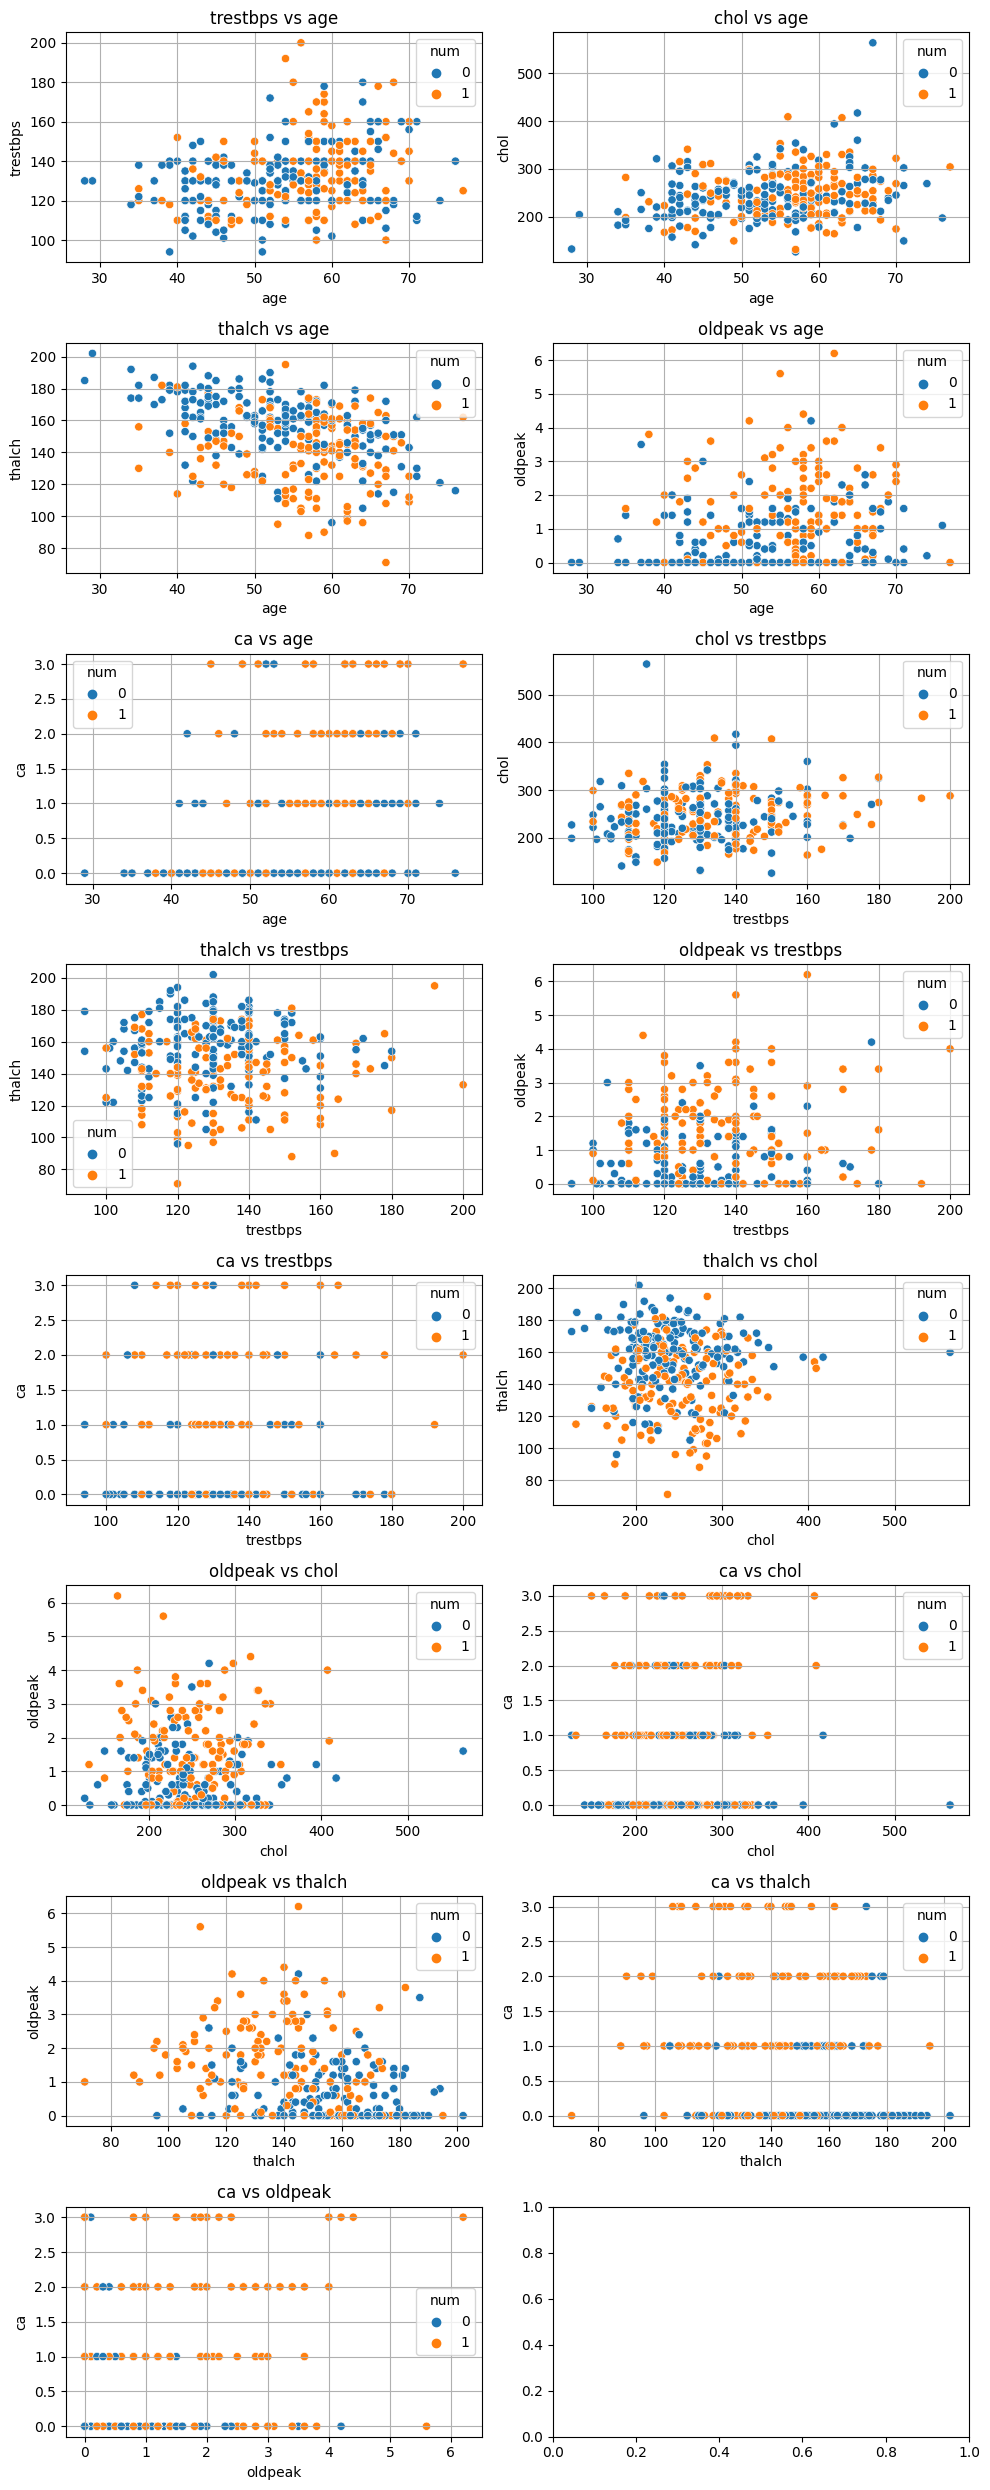

In [465]:
X_tmp_numeric = X_numeric.copy()
X_tmp_numeric.loc[X_tmp_numeric["num"] > 0, "num"] = 1
numeric_features = X_tmp_numeric.columns.values[:-1]

n = len(numeric_features)
valid_axes = [(i, j) for i in range(n-1) for j in range(i+1, n) if i != j and j > i]

num_rows = 8
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 25))

for idx, (i, j) in enumerate(valid_axes):
    if idx == 15:
        break
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    sns.scatterplot(data=X_tmp_numeric, x=numeric_features[i], y=numeric_features[j], hue="num", ax=ax)
    ax.grid(True)
    ax.set_title(f"{numeric_features[j]} vs {numeric_features[i]}")

plt.tight_layout()
plt.show()
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


Iz ovih grafova možemo saznati sljedeće:

- puno više pacijenta iznad 50 godina ima neku razinu srčanih bolesti
- ako  su 2 ili 3 arterije (ca) obojane dosta je izgledno da se radi o srčanoj bolesti
- ako je status depresije (oldpeak) veći od 1 znatno se povećava i broj srčanih bolesnika


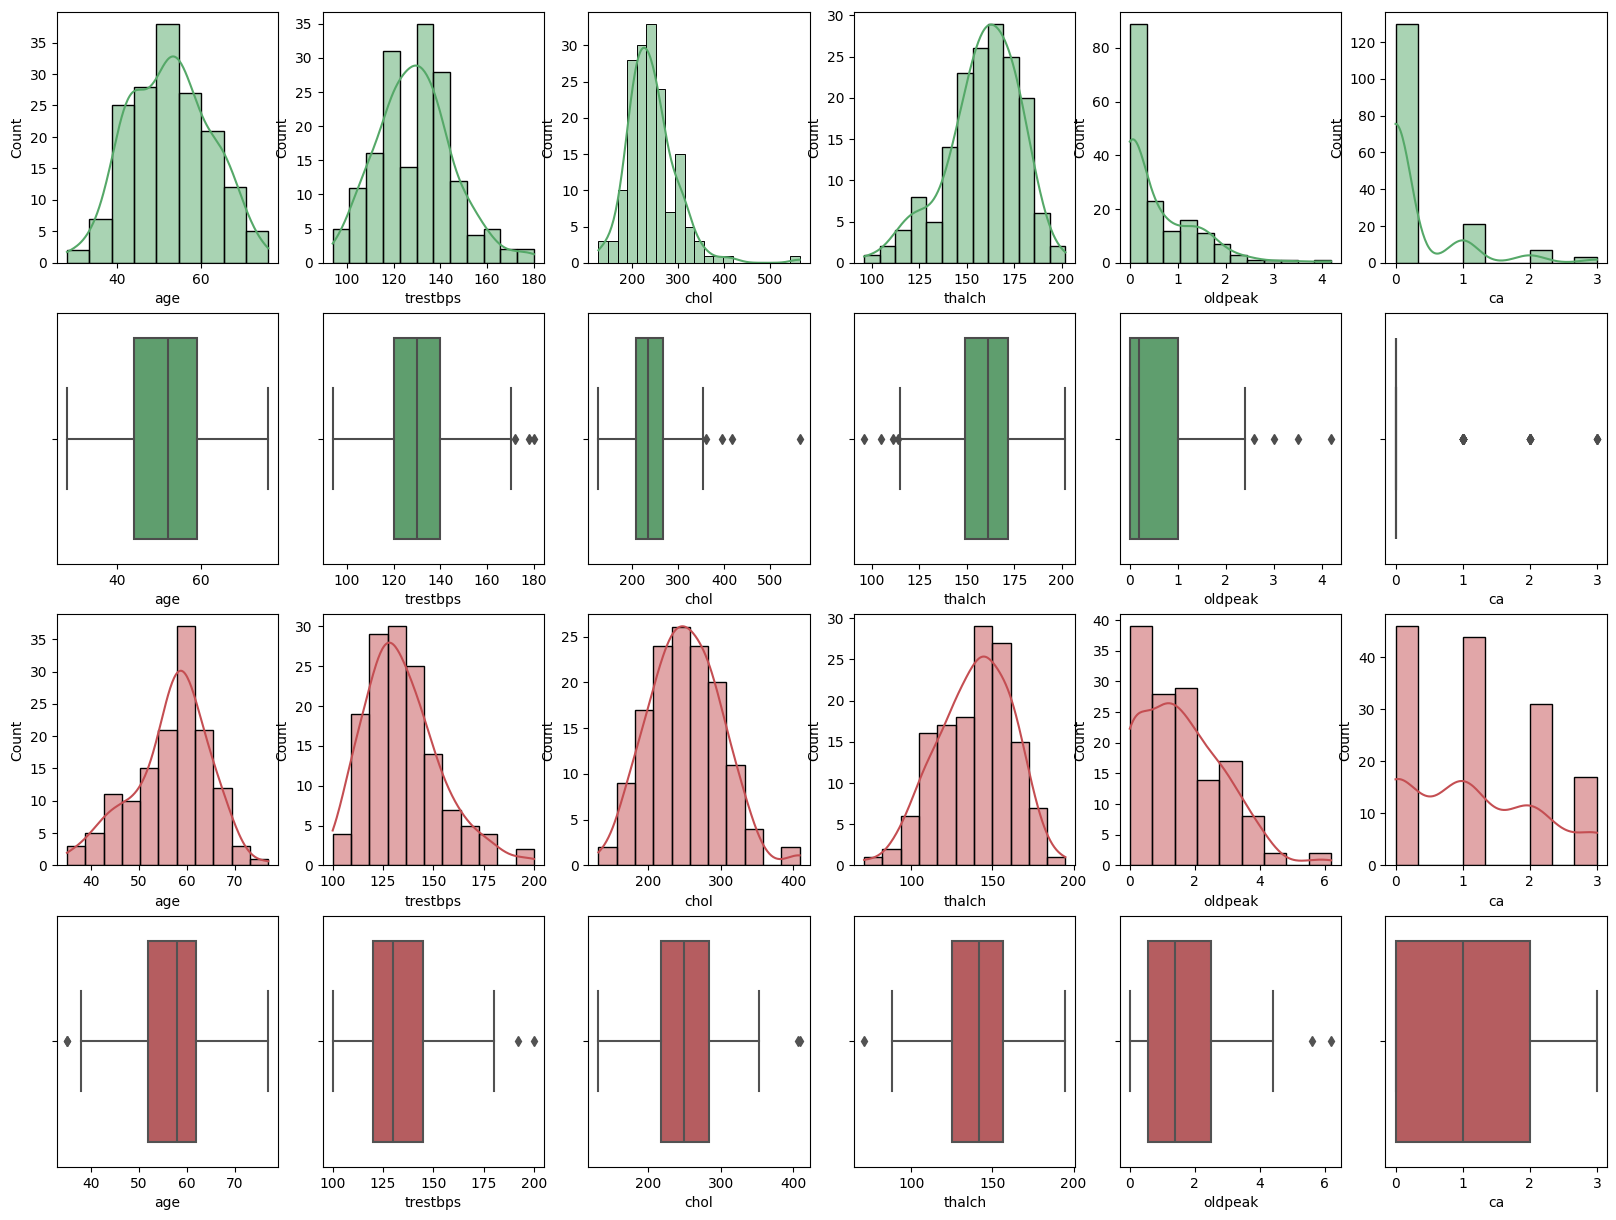

In [515]:
from scipy.stats import shapiro

X_tmp_numeric_good = X_tmp_numeric.loc[X.num == 0]
X_tmp_numeric_bad = X_tmp_numeric.loc[X.num > 0]
fig, axes = plt.subplots(4, len(numeric_features), figsize=(20, 15))
for i in range(4):
    for j in range(len(numeric_features)):
        ax = axes[i, j]
            
        if i == 0:
            sns.histplot(X_tmp_numeric_good[numeric_features[j]], kde=True, ax=ax, color="g")
        if i == 1:
            sns.boxplot(data=X_tmp_numeric_good, x=numeric_features[j], ax=ax, color="g") 
            
        if i == 2:
            sns.histplot(X_tmp_numeric_bad[numeric_features[j]], kde=True, ax=ax, color="r")
        if i == 3:
            sns.boxplot(data=X_tmp_numeric_bad, x=numeric_features[j], ax=ax, color="r") 


plt.show()
sns.reset_defaults()



In [520]:
X_tmp_numeric_bad.describe().round() -X_tmp_numeric_good.describe().round()



,age,trestbps,chol,thalch,oldpeak,ca,num
count,-26.0,-26.0,-26.0,-26.0,-26.0,-23.0,-26.0
mean,5.0,6.0,9.0,-20.0,1.0,1.0,1.0
std,-2.0,3.0,-5.0,4.0,0.0,0.0,0.0
min,7.0,6.0,5.0,-25.0,0.0,0.0,1.0
25%,8.0,0.0,10.0,-24.0,1.0,0.0,1.0
50%,6.0,0.0,15.0,-19.0,1.0,1.0,1.0
75%,3.0,5.0,17.0,-16.0,1.0,2.0,1.0
max,1.0,20.0,-155.0,-7.0,2.0,0.0,1.0


Na temelju gore histograma i pripadajućih boxplota, zajedno s tablicom razlike statističkih vrijednosti možemo saznati sljedeće:

- age: u prosjeku starije osobe su sklonije srčanim bolestima, minimalna starost srčanog bolesnika je 7 godina veća od minimalne vrijednosti zdrave osobe, a ta razlika (uz relativno malu razliku odstupanja između distribucija) je veća od prosječne razlike dobi

- trestbps: kod krvnog tlaka, distribucija srčanih bolesnika ima u prosjeku veći mirujući krvni tlak kao i varijabilnost, ali i outliere. Obzirom da se ne radi o centralnoj distribuciji, a prosjeci su jako osjetljivi na stršeće vrijednosti, u ovom slučaju medijan je bolja mjera centralnosti, a za ovaj slučaj je ista. Ono što jedino možemo s određenom pouzdanošću tvrditi je to da će srčani bolesnici imati znatno veća odstupanja od prosjeka

- chol: ako usporedimo medijan prvog  (bolja mjera jer nije centralna distribucija) i prosjek drugog (to možemo jer u drugom slučaju medijan odgovara prosjeku zato što se radi o centralnoj distribuciji) vidimo da srčani bolesnici imaju veći kolesterol. Treba dodatno razmotriti što se događa sa stršećim vrijednostima kao i većom varijabilnošću kod kolesterola zdravih ljudi

- thalch: veći znatno medijan imaju zdravi pacijenti u odnosu na nezdrave, kao i cijeli IQR

- odlpeak: prosjek kao i medijan je za 1 pomaknut u desno, a uz istu varijabilnost znači da u prosjeku srčani bolesnici će imati veće vrijednosti oldpeaka

- ca: kao i za oldpeak, isto vrijedi i za ca samo što je u pitanju diskretna distribucija. U tom slučaju, možemo vidjeti da puno više srčanih bolesnika ima vrijednosti ca >=1

Idemo provesti statističko testiranje kako bismo utvrdili pouzdanost ovih tvrdnji:

<h4>Homoskedastičnost</h4>

In [529]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy import stats
gauss_check = []



for i in range(len(numeric_features)-1):
    stat, p = stats.levene(X_tmp_numeric_good[numeric_features[i]], X_tmp_numeric_bad[numeric_features[i]])
    gauss_check.append({numeric_features[i]: p})

gauss_check

[{'age': 0.0035318257000187224},
 {'trestbps': 0.1417760060017809},
 {'chol': 0.7771663407879495},
 {'thalch': 0.024987927000416205},
 {'oldpeak': 1.796644094243667e-08}]

Uvjet iste varijance grupa je ostvarena samo kod kolesterola i mirujućeg krvnog tlaka.

<h4>Normalnost</h4>

In [531]:
gauss_check_good = []
gauss_check_bad = []



for i in range(len(numeric_features)-1):
    stat, p = shapiro(X_tmp_numeric_good[numeric_features[i]])
    gauss_check_good.append({numeric_features[i]: p})

    stat, p = shapiro(X_tmp_numeric_bad[numeric_features[i]])
    gauss_check_bad.append({numeric_features[i]: p})


gauss_check_good, gauss_check_bad

([{'age': 0.23810459673404694},
  {'trestbps': 0.010528828017413616},
  {'chol': 5.495849997316782e-09},
  {'thalch': 0.0005361537914723158},
  {'oldpeak': 7.917396528970763e-15}],
 [{'age': 0.002255581319332123},
  {'trestbps': 0.00011726607044693083},
  {'chol': 0.40250614285469055},
  {'thalch': 0.3523006737232208},
  {'oldpeak': 2.3386103293887572e-06}])

Normalne distribucije kod zdravih pacijenata: dob

Normalne distribucije kod srčanih bolesnika: kolesterol i thalch

<h4>T-test</h4>

In [534]:
gauss_check = []
from scipy.stats import mannwhitneyu



for i in range(len(numeric_features)-1):
    stat, p = stats.ttest_ind(X_tmp_numeric_good[numeric_features[i]], X_tmp_numeric_bad[numeric_features[i]])
    gauss_check.append({numeric_features[i]: p})

gauss_check

[{'age': 5.8111495549848545e-05},
 {'trestbps': 0.008404480862122001},
 {'chol': 0.11324855513729683},
 {'thalch': 2.142445440468379e-14},
 {'oldpeak': 7.743511486560228e-15}]

Da bi t-test bio valjan mora zadovoljiti 3 uvjeta:
- normalnost grupa
- jednakost varijanci
- neovisnost uzoraka

Vidimo da ne postoji statistički značajna razlika između prosjeka kolesterola kod srčanih i zdravih pacijenata, no moramo uzeti u obzir da jedan uvjet, a to je normalnost nije zadovoljena kod distribucije kolesterola zdravih ljudi. Za ostale atribute postoji statistički značajna razlika, no potrebno je još detaljnije provjeriti obzirom da nisu pretpostavke t-testa ispunjene.

<h3>Čišćenje podataka</h3>

<h4>Nedostajuće vrijednosti</h4>

In [535]:
X[X['dataset'] == "Cleveland"].isna().sum()


age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       1
ca          5
thal        3
num         0
dtype: int64

Imamo 5 nedostajućih vrijednosti za ca. Obzirom da se radi o numeričkom atributu, nadopuniti ćemo ih prosječnom ca vrijednošću. Ostale kategoričke atribute koji imaju nedostajuće vrijednosti ćemo ukloniti jer čine 1% skupa podataka, što nije značajno.

In [536]:
X_numeric.loc[X_numeric.ca.isna(), "ca"] = X_numeric.loc[:, "ca"].mean().round()

In [558]:
X_categoric = X_categoric.drop("dataset", axis=1)
X_categoric = X_categoric.loc[X_categoric.slope.notnull(), :]
X_categoric = X_categoric.loc[X_categoric.thal.notnull(), :]

In [559]:
X_categoric.isna().sum()

sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64